<a href="https://colab.research.google.com/github/MANISH-KUMAR-CODES/Exploratory-Analysis-on-International-t20-/blob/main/Exploratory_Analysis_on_International_t20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<B>Analysis ON International t20

###Lets us first import all the necessary libraries of python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
International_T20_Data = pd.read_csv('/content/drive/MyDrive/Copy of International_T20_Data.csv')

In [3]:
#lets check whats inside our data
International_T20_Data

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,...,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,...,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 5)]",male,T20,NaN,Hong Kong,20,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,"[datetime.date(2016, 6, 18)]",male,T20,NaN,Zimbabwe,20,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",0.9,2016-03-05,2,"[datetime.date(2016, 3, 4)]",male,T20,6.0,Pakistan,20,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1413,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",0.9,2016-03-08,1,"[datetime.date(2016, 3, 6)]",male,T20,8.0,India,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1414,"[{'1st innings': {'team': 'Netherlands', 'deli...",0.9,2016-02-03,1,"[datetime.date(2016, 2, 3)]",male,T20,NaN,Netherlands,20,...,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1415,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 6)]",male,T20,NaN,Australia,20,...,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#top 5 rows
International_T20_Data.head(5)

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,...,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,...,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 5)]",male,T20,NaN,Hong Kong,20,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,"[datetime.date(2016, 6, 18)]",male,T20,NaN,Zimbabwe,20,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#last 5 rows
International_T20_Data.tail(5)

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,...,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
1412,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",0.9,2016-03-05,2,"[datetime.date(2016, 3, 4)]",male,T20,6.0,Pakistan,20,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1413,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",0.9,2016-03-08,1,"[datetime.date(2016, 3, 6)]",male,T20,8.0,India,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1414,"[{'1st innings': {'team': 'Netherlands', 'deli...",0.9,2016-02-03,1,"[datetime.date(2016, 2, 3)]",male,T20,NaN,Netherlands,20,...,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1415,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 6)]",male,T20,NaN,Australia,20,...,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1416,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 9)]",male,T20,4.0,Australia,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Checking info
International_T20_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   innings                      1417 non-null   object 
 1   meta.data_version            1417 non-null   float64
 2   meta.created                 1417 non-null   object 
 3   meta.revision                1417 non-null   int64  
 4   info.dates                   1417 non-null   object 
 5   info.gender                  1417 non-null   object 
 6   info.match_type              1417 non-null   object 
 7   info.outcome.by.wickets      651 non-null    float64
 8   info.outcome.winner          1372 non-null   object 
 9   info.overs                   1417 non-null   int64  
 10  info.player_of_match         1255 non-null   object 
 11  info.teams                   1417 non-null   object 
 12  info.toss.decision           1417 non-null   object 
 13  info.toss.winner  

In [7]:
#checking descriptive summary
International_T20_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
meta.data_version,1417.0,0.900000,5.108829e-15,0.9,0.9,0.9,0.90,0.9
meta.revision,1417.0,1.370501,5.751977e-01,1.0,1.0,1.0,2.00,5.0
info.outcome.by.wickets,651.0,6.476190,1.987802e+00,1.0,5.0,7.0,8.00,10.0
info.overs,1417.0,20.063514,1.379399e+00,20.0,20.0,20.0,20.00,50.0
info.outcome.by.runs,721.0,39.088766,3.338576e+01,1.0,13.0,30.0,56.00,249.0
info.match_type_number,684.0,748.774854,1.900503e+02,380.0,627.0,746.5,883.25,1104.0
info.neutral_venue,328.0,1.000000,0.000000e+00,1.0,1.0,1.0,1.00,1.0


In [8]:
#lets us define a function to replace column names
def replace_name(dataframe):
    dataframe.astype(str)
    dataframe_new_column=[]
    for i in dataframe.columns:
       if  'meta.' in i:
          i = i.replace('meta.','')
          dataframe_new_column.append(i)
       else: 
             'info.' in i
             i = i.replace('info.','')
             dataframe_new_column.append(i)
    return dataframe_new_column

In [9]:
new_columns = replace_name(International_T20_Data)
new_columns

['innings',
 'data_version',
 'created',
 'revision',
 'dates',
 'gender',
 'match_type',
 'outcome.by.wickets',
 'outcome.winner',
 'overs',
 'player_of_match',
 'teams',
 'toss.decision',
 'toss.winner',
 'umpires',
 'venue',
 'city',
 'outcome.by.runs',
 'match_type_number',
 'neutral_venue',
 'outcome.method',
 'outcome.result',
 'outcome.eliminator',
 'supersubs.New Zealand',
 'supersubs.South Africa',
 'bowl_out',
 'outcome.bowl_out']

In [10]:
International_T20_Data.columns = new_columns
International_T20_Data.head()

,innings,data_version,created,revision,dates,gender,match_type,outcome.by.wickets,outcome.winner,overs,...,outcome.by.runs,match_type_number,neutral_venue,outcome.method,outcome.result,outcome.eliminator,supersubs.New Zealand,supersubs.South Africa,bowl_out,outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,...,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 5)]",male,T20,NaN,Hong Kong,20,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,"[datetime.date(2016, 6, 18)]",male,T20,NaN,Zimbabwe,20,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
International_T20_Data.isnull().sum()

innings                      0
data_version                 0
created                      0
revision                     0
dates                        0
gender                       0
match_type                   0
outcome.by.wickets         766
outcome.winner              45
overs                        0
player_of_match            162
teams                        0
toss.decision                0
toss.winner                  0
umpires                     22
venue                        0
city                       189
outcome.by.runs            696
match_type_number          733
neutral_venue             1089
outcome.method            1366
outcome.result            1372
outcome.eliminator        1401
supersubs.New Zealand     1416
supersubs.South Africa    1416
bowl_out                  1415
outcome.bowl_out          1415
dtype: int64

###As we can see some columns have 1415 null values out of 1417 entries.It will be better if we drop all these columns.

In [12]:
International_T20_Data=International_T20_Data.drop(['outcome.bowl_out','bowl_out','supersubs.South Africa','supersubs.New Zealand','outcome.eliminator','outcome.method','outcome.result'], axis = 1)

In [13]:
#lets again check our nulls again
International_T20_Data.isnull().sum()

innings                  0
data_version             0
created                  0
revision                 0
dates                    0
gender                   0
match_type               0
outcome.by.wickets     766
outcome.winner          45
overs                    0
player_of_match        162
teams                    0
toss.decision            0
toss.winner              0
umpires                 22
venue                    0
city                   189
outcome.by.runs        696
match_type_number      733
neutral_venue         1089
dtype: int64

In [14]:
#lets fill all the null valeues with 0
International_T20_Data=International_T20_Data.fillna(0)

In [15]:
#lets again check our nulls again
International_T20_Data.isnull().sum()

innings               0
data_version          0
created               0
revision              0
dates                 0
gender                0
match_type            0
outcome.by.wickets    0
outcome.winner        0
overs                 0
player_of_match       0
teams                 0
toss.decision         0
toss.winner           0
umpires               0
venue                 0
city                  0
outcome.by.runs       0
match_type_number     0
neutral_venue         0
dtype: int64

###We also see that there are columns like dataversion ,revision and created which is of no use for our analysis , lets drops these columns from our dataframe

In [16]:
International_T20_Data=International_T20_Data.drop(['data_version','created','revision'],axis =1)


In [17]:
International_T20_Data.columns.unique()

Index(['innings', 'dates', 'gender', 'match_type', 'outcome.by.wickets',
       'outcome.winner', 'overs', 'player_of_match', 'teams', 'toss.decision',
       'toss.winner', 'umpires', 'venue', 'city', 'outcome.by.runs',
       'match_type_number', 'neutral_venue'],
      dtype='object')

##Our date column is not in correct format .we need to change that

In [18]:
def modifying_date(dataframe):
    dates=[]
    for i in dataframe.dates:
        i = i.replace('[datetime.date(','').replace(')]','').replace(',','-').replace("['",'').replace("']",'')
        dates.append(i)
    return dates    

In [19]:
dates = modifying_date(International_T20_Data)

In [20]:
International_T20_Data['dates']=dates
International_T20_Data['dates'].astype(str)

0       2017- 2- 17
1       2017- 2- 19
2       2017- 2- 22
3        2016- 9- 5
4       2016- 6- 18
           ...     
1412     2016- 3- 4
1413     2016- 3- 6
1414     2016- 2- 3
1415     2016- 9- 6
1416     2016- 9- 9
Name: dates, Length: 1417, dtype: object

In [21]:
#checking our dataframe again
International_T20_Data.head()

,innings,dates,gender,match_type,outcome.by.wickets,outcome.winner,overs,player_of_match,teams,toss.decision,toss.winner,umpires,venue,city,outcome.by.runs,match_type_number,neutral_venue
0,"[{'1st innings': {'team': 'Australia', 'delive...",2017- 2- 17,male,T20,5.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Melbourne Cricket Ground,0,0.0,0.0,0.0
1,"[{'1st innings': {'team': 'Australia', 'delive...",2017- 2- 19,male,T20,2.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['SD Fry', 'SJ Nogajski']","Simonds Stadium, South Geelong",Victoria,0.0,0.0,0.0
2,"[{'1st innings': {'team': 'Australia', 'delive...",2017- 2- 22,male,T20,0.0,Australia,20,['A Zampa'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Adelaide Oval,0,41.0,0.0,0.0
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",2016- 9- 5,male,T20,0.0,Hong Kong,20,0,"['Ireland', 'Hong Kong']",bat,Hong Kong,"['R Black', 'AJ Neill']","Bready Cricket Club, Magheramason",Londonderry,40.0,0.0,0.0
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",2016- 6- 18,male,T20,0.0,Zimbabwe,20,['E Chigumbura'],"['Zimbabwe', 'India']",field,India,"['TJ Matibiri', 'RB Tiffin']",Harare Sports Club,0,2.0,0.0,0.0


##lets us fix some columns names by replacing '.' from them with '_'

In [22]:
International_T20_Data.rename(columns = {'outcome.by.wickets':'outcome_by_wickets', 'outcome.winner':'outcome_winner','toss.decision':'toss_decision','toss.winner':'toss_winner','outcome.by.runs':'outcome_by_runs'}, inplace = True)

##Lets us check the top winning teams

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text major ticklabel objects>)

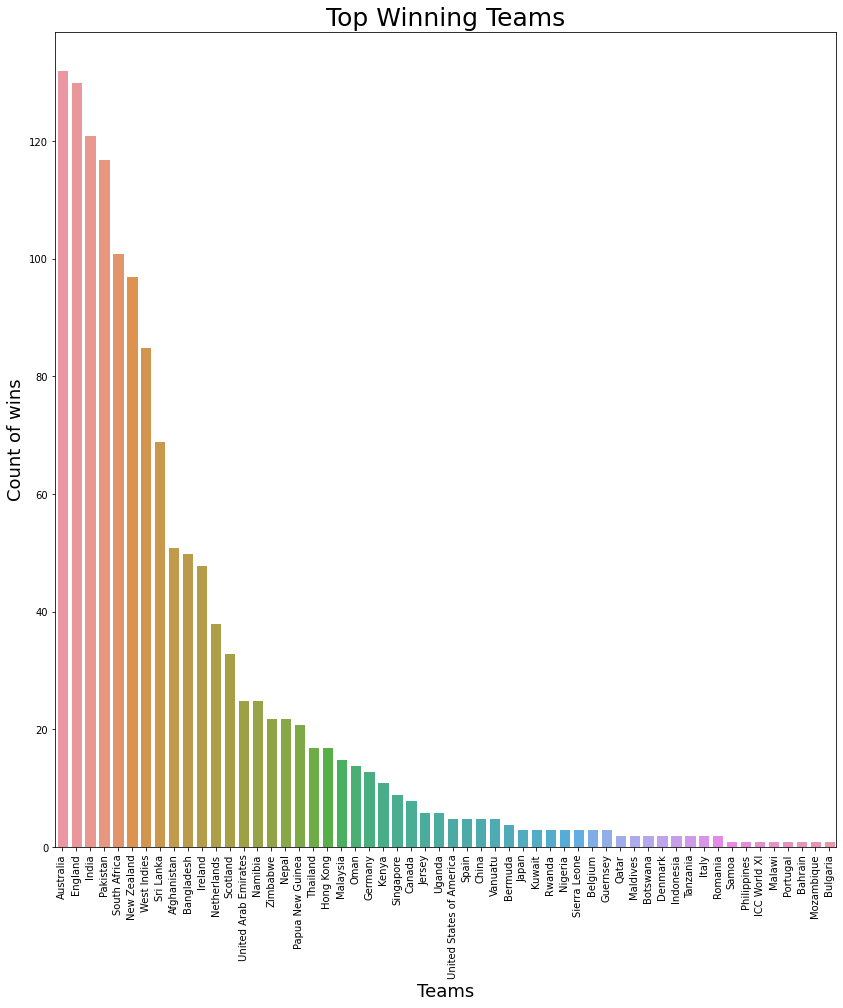

In [23]:
topwinning_teams = International_T20_Data['outcome_winner'].value_counts().drop(0,axis = 0)
plt.figure(figsize=(14,15))                              #setting figure size
plt.xlabel('Teams',size=18)                              
plt.ylabel('Count of wins',size = 18)
plt.title('Top Winning Teams',size=25)
sns.set_theme(style="whitegrid")
#using barplot
sns.barplot(topwinning_teams.index,topwinning_teams.values)
plt.xticks(rotation = 90)

##lets check winning teams based on their field decesion

In [24]:
winning_teams_field_decision = International_T20_Data.groupby('toss_decision')['outcome_winner'].value_counts()

In [25]:
print(winning_teams_field_decision)

toss_decision  outcome_winner
bat            Australia         72
               England           67
               Pakistan          67
               South Africa      42
               West Indies       42
                                 ..
field          Maldives           1
               Mozambique         1
               Philippines        1
               Sierra Leone       1
               Uganda             1
Name: outcome_winner, Length: 96, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'Top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


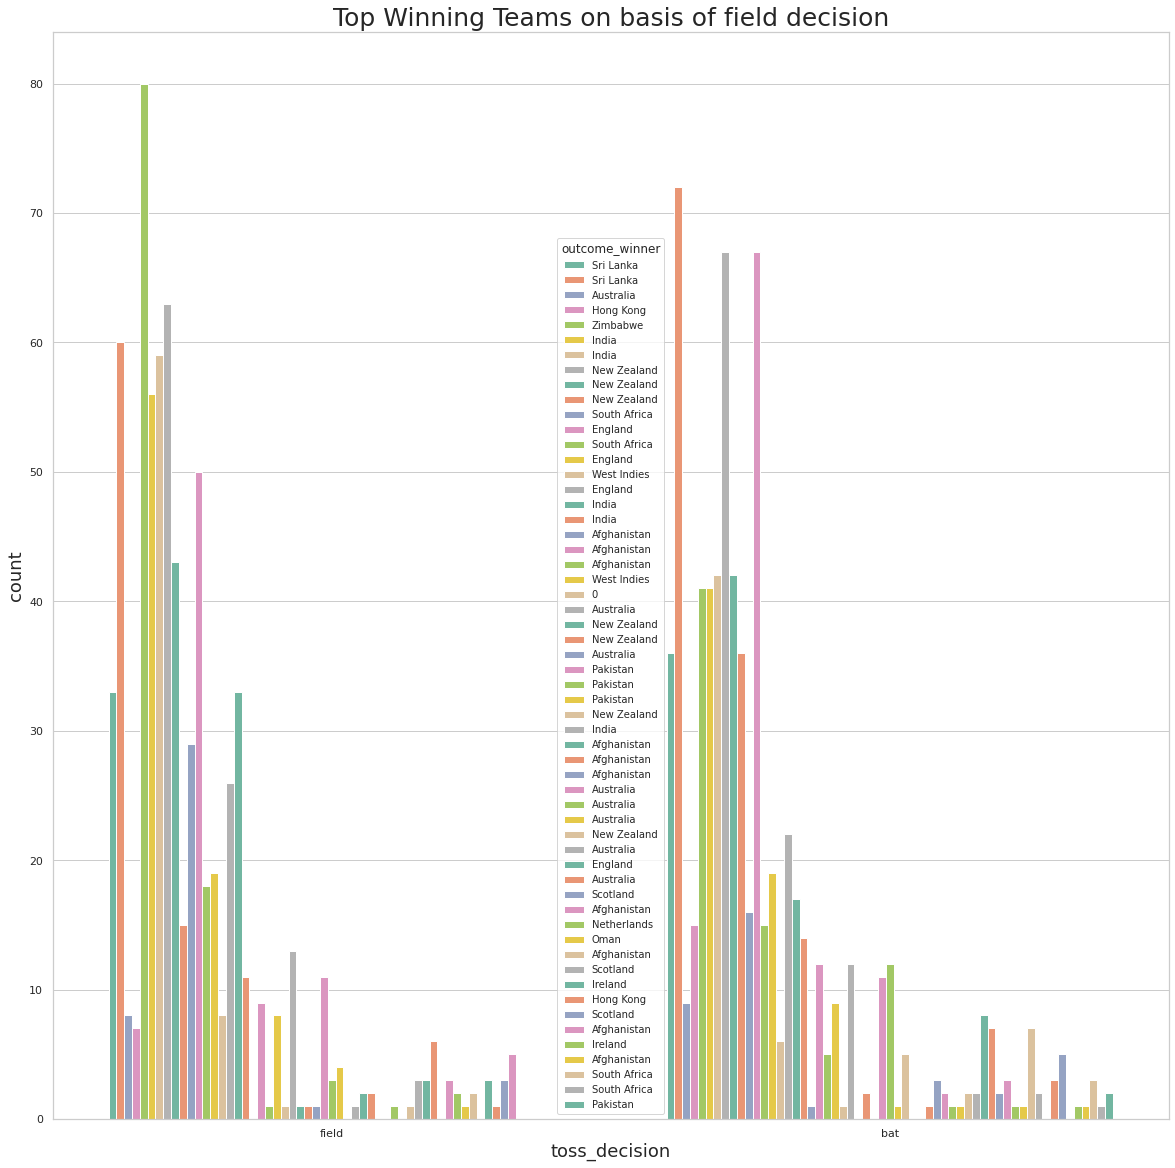

In [26]:
plt.figure(figsize=(20,20))                              #setting figure size
plt.xlabel('Teams',size=18)                              
plt.ylabel('Count of wins',size = 18)
plt.title('Top Winning Teams on basis of field decision',size=25)
sns.set_theme(style="whitegrid")
#using countplot
sns.countplot(x='toss_decision',hue ='outcome_winner',data = International_T20_Data,palette= 'Set2')
plt.legend(International_T20_Data.outcome_winner, loc="Top right", title="outcome_winner",fontsize = "small");
plt.show()


## lets check which teams have played most innings together with their counts


In [27]:
Teams = International_T20_Data.teams.value_counts().head(30)
Teams

['England', 'Pakistan']            29
['Australia', 'Pakistan']          26
['England', 'Australia']           25
['Australia', 'India']             24
['England', 'West Indies']         23
['New Zealand', 'Pakistan']        21
['Australia', 'England']           20
['Pakistan', 'Sri Lanka']          19
['Sri Lanka', 'West Indies']       18
['India', 'South Africa']          17
['Australia', 'Sri Lanka']         17
['England', 'South Africa']        17
['Afghanistan', 'Ireland']         17
['New Zealand', 'West Indies']     16
['New Zealand', 'England']         16
['India', 'Sri Lanka']             16
['South Africa', 'Sri Lanka']      15
['England', 'India']               15
['New Zealand', 'South Africa']    15
['New Zealand', 'Sri Lanka']       14
['South Africa', 'Australia']      14
['India', 'Pakistan']              14
['New Zealand', 'India']           14
['India', 'West Indies']           13
['Australia', 'West Indies']       13
['Netherlands', 'Scotland']        13
['Pakistan',

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Teams')

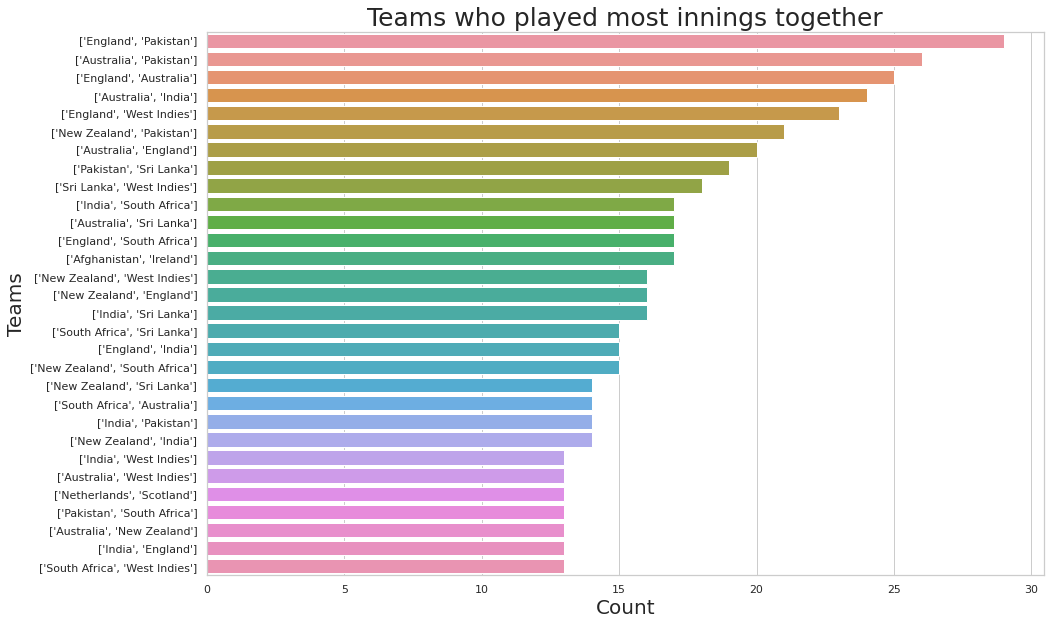

In [28]:
#Plotting a bar plot
plt.figure(figsize=(15,10))                              #setting figure size                           
plt.title('Teams who played most innings together',size=25)
sns.set_theme(style="whitegrid")
sns.barplot(Teams,Teams.index)
plt.xlabel('Count',size = 20)
plt.ylabel('Teams',size = 20)

##<b>Top players of the match

In [29]:
top_players_of_match = International_T20_Data['player_of_match'].value_counts().drop(0).head(30)
top_players_of_match

['V Kohli']             12
['Mohammad Nabi']       12
['Mohammad Shahzad']    10
['Mohammad Hafeez']     10
['DJS Dottin']          10
['RG Sharma']           10
['Shahid Afridi']       10
['SJ Taylor']            9
['SR Watson']            9
['AJ Healy']             9
['CH Gayle']             9
['DA Warner']            9
['EJG Morgan']           8
['L Lee']                8
['EA Perry']             7
['BB McCullum']          7
['A Shrubsole']          7
['MJ Guptill']           7
['SFM Devine']           7
['AB de Villiers']       7
['MDKJ Perera']          7
['MM Lanning']           7
['M Raj']                7
['SW Bates']             7
['C Munro']              7
['PR Stirling']          7
['Umar Akmal']           7
['Yuvraj Singh']         7
['RE van der Merwe']     6
['SR Taylor']            6
Name: player_of_match, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top players of match')

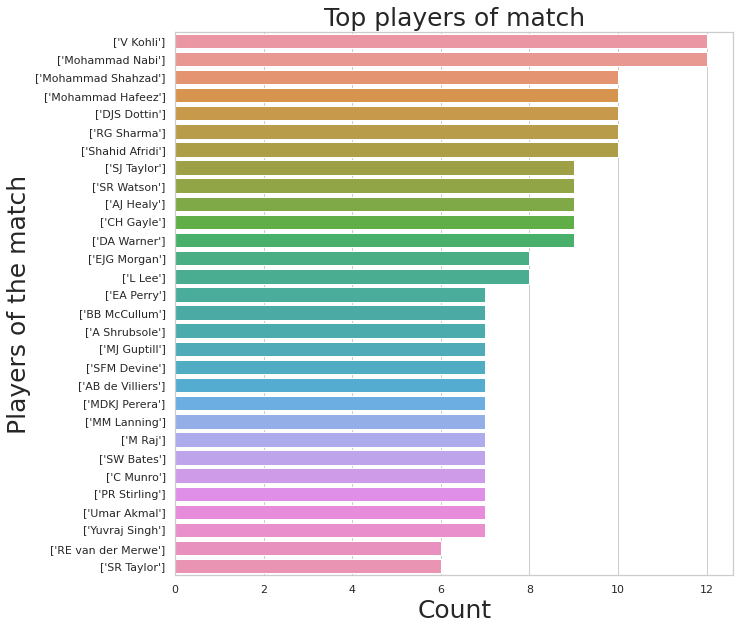

In [30]:
plt.figure(figsize=(10,10))
plt.ylabel('Players of the match',size=25)
sns.barplot(top_players_of_match,top_players_of_match.index)
plt.xlabel('Count',size = 25)
plt.title('Top players of match',size=25)

##<B> TOP MOST VENUES 

In [31]:
Top_venue = International_T20_Data['venue'].value_counts()

In [32]:
first_list=[]
second_list =[]
Top_venue_dict ={}
for i in Top_venue.index:
  first_list.append(i)
  for j in Top_venue:
    second_list.append(j)

  Top_venue_dict = dict(zip(first_list,second_list))

In [33]:
Top_10_venues = pd.DataFrame(list(Top_venue_dict.items()), columns = ['Venue names','Count']).head(10)
Top_10_venues

,Venue names,Count
0,Dubai International Cricket Stadium,62
1,Sheikh Zayed Stadium,41
2,Shere Bangla National Stadium,39
3,R Premadasa Stadium,35
4,Kinrara Academy Oval,32
5,County Ground,27
6,Sylhet Stadium,26
7,New Wanderers Stadium,25
8,Harare Sports Club,24
9,Eden Park,23


Text(0.5, 1.0, 'BarPlot')

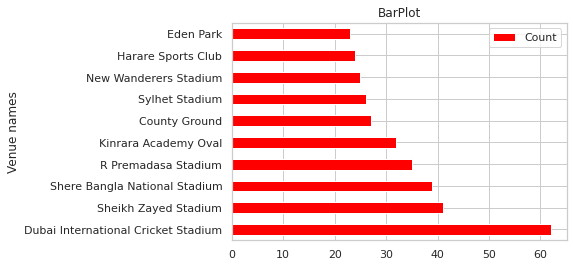

In [34]:
Top_10_venues.plot(kind = 'barh',
                   x = 'Venue names',
                   y = 'Count',
                   color = 'red')
plt.title('BarPlot')

#<B> Umpires who handled most of matches

In [35]:
Umpires_with_most_matches = International_T20_Data.umpires.value_counts().drop(0).head(10)

In [36]:
third_list=[]
fourth_list =[]
Umpires = {}
for i in Umpires_with_most_matches.index:
  third_list.append(i)
  for j in Umpires_with_most_matches:
    fourth_list.append(j)

  Umpires = dict(zip(third_list,fourth_list))

In [37]:
Top_10_Umpires_with_most_matches = pd.DataFrame(list(Umpires.items()), columns = ['Umpire names','Count']).head(10)

In [38]:
Top_10_Umpires_with_most_matches

,Umpire names,Count
0,"['REJ Martinesz', 'RSA Palliyaguruge']",12
1,"['JD Cloete', 'S George']",12
2,"['IJ Gould', 'RA Kettleborough']",10
3,"['Ahsan Raza', 'Shozab Raza']",10
4,"['S George', 'AT Holdstock']",9
5,"['CM Brown', 'SB Haig']",9
6,"['BF Bowden', 'AL Hill']",8
7,"['GO Brathwaite', 'JS Wilson']",8
8,"['REJ Martinesz', 'RR Wimalasiri']",8
9,"['PJ Nero', 'JS Wilson']",8
